# <a id='toc1_'></a>[$$ Day-5-Assignment $$](#toc0_)

----

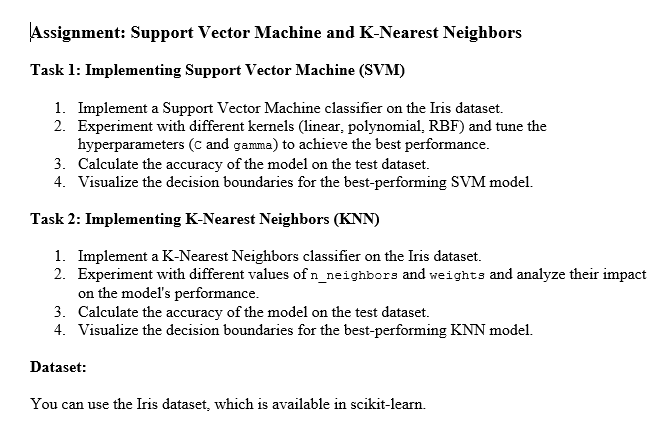

---

## **Table of contents**<a id='toc0_'></a>    
### [$$ Day-5-Assignment $$](#toc1_)    
  - [Required Libraries](#toc1_1_)    
  - [Load the Iris dataset](#toc1_2_)    
  - [Split the dataset into training and test sets](#toc1_3_)    
  - [Standardize the features](#toc1_4_)    
  - [Experiment with different kernels (linear, polynomial, RBF) and tune the hyperparameters (C and gamma) to achieve the best performance.](#toc1_5_)    
    - [Linear kernel](#toc1_5_1_)    
    - [Polynomial kernel](#toc1_5_2_)    
    - [RBF kernel](#toc1_5_3_)    
    - [Calculate the accuracy of the model on the test dataset.](#toc1_5_4_)    
    - [Visualize the decision boundaries for the best-performing SVM model.](#toc1_5_5_)    
  - [Task 2: Implementing K-Nearest Neighbors (KNN)](#toc1_6_)    
    - [Implement a K-Nearest Neighbors classifier on the Iris dataset.](#toc1_6_1_)    
    - [Experiment with different values of n_neighbors and weights and analyze their impact on the model's performance](#toc1_6_2_)    
    - [Accuracy results](#toc1_6_3_)    
    - [Best KNN model (retrain with 2 features)](#toc1_6_4_)    
    - [Plotting decision boundaries for the best-performing KNN model](#toc1_6_5_)    
    - [Conclusion](#toc1_6_6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

---

## <a id='toc1_1_'></a>[Required Libraries](#toc0_)

In [1]:
try:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn import datasets
    from sklearn.model_selection import train_test_split
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score
    from sklearn.preprocessing import StandardScaler
    from mlxtend.plotting import plot_decision_regions
except:
    !pip install pandas
    !pip install numpy
    !pip install scikit_learn
    !pip install mlxtend
    !pip install matplotlib
    
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn import datasets
    from sklearn.model_selection import train_test_split
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score
    from sklearn.preprocessing import StandardScaler
    from mlxtend.plotting import plot_decision_regions
    

---

## <a id='toc1_2_'></a>[Load the Iris dataset](#toc0_)

In [2]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

---

## <a id='toc1_3_'></a>[Split the dataset into training and test sets](#toc0_)

In [3]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


----

## <a id='toc1_4_'></a>[Standardize the features](#toc0_)

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

---

## <a id='toc1_5_'></a>[Experiment with different kernels (linear, polynomial, RBF) and tune the hyperparameters (C and gamma) to achieve the best performance.](#toc0_)

In [5]:
# Define a dictionary to store accuracy scores
svm_results = {}

...........................................................................................................................................................................................................................................................................................................................................................................................

### <a id='toc1_5_1_'></a>[Linear kernel](#toc0_)

In [6]:


svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
svm_results['linear'] = accuracy_linear


...........................................................................................................................................................................................................................................................................................................................................................................................

### <a id='toc1_5_2_'></a>[Polynomial kernel](#toc0_)

In [7]:
svm_poly = SVC(kernel='poly', C=1.0, gamma='auto', degree=3)
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
svm_results['poly'] = accuracy_poly


...........................................................................................................................................................................................................................................................................................................................................................................................

### <a id='toc1_5_3_'></a>[RBF kernel](#toc0_)

In [8]:


svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
svm_results['rbf'] = accuracy_rbf

---

### <a id='toc1_5_4_'></a>[Calculate the accuracy of the model on the test dataset.](#toc0_)

In [9]:

# Print the accuracy results
print("SVM Results:")
for kernel, accuracy in svm_results.items():
    print(f"Kernel: {kernel}, Accuracy: {accuracy}")

SVM Results:
Kernel: linear, Accuracy: 0.9777777777777777
Kernel: poly, Accuracy: 0.9555555555555556
Kernel: rbf, Accuracy: 1.0


---

### <a id='toc1_5_5_'></a>[Visualize the decision boundaries for the best-performing SVM model.](#toc0_)

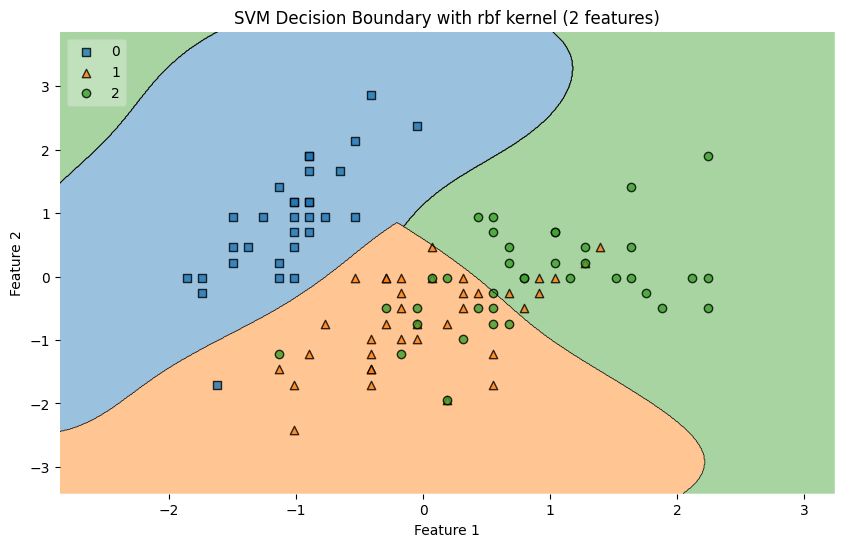

In [10]:
# Visualize decision boundaries for the best-performing SVM model
best_kernel = max(svm_results, key=svm_results.get)
if best_kernel == 'linear':
    best_svm = svm_linear
elif best_kernel == 'poly':
    best_svm = svm_poly
else:
    best_svm = svm_rbf

# Select the first two features for visualization
X_train_2d = X_train[:, :2]
X_test_2d = X_test[:, :2]

# Best SVM model (retrain with 2 features)
best_svm_2d = SVC(kernel=best_svm.kernel, C=best_svm.C, gamma=best_svm.gamma)
best_svm_2d.fit(X_train_2d, y_train)

# Plotting decision boundaries for the best-performing SVM model
plt.figure(figsize=(10, 6))
plot_decision_regions(X_train_2d, y_train, clf=best_svm_2d, legend=2)
plt.title(f'SVM Decision Boundary with {best_kernel} kernel (2 features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


 Conclusion

 
 SVM model with an RBF kernel demonstrates strong performance in separating the three classes, highlighting its capability to manage non-linear decision boundaries effectively.

----

## <a id='toc1_6_'></a>[Task 2: Implementing K-Nearest Neighbors (KNN)](#toc0_)

### <a id='toc1_6_1_'></a>[Implement a K-Nearest Neighbors classifier on the Iris dataset.](#toc0_)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

# Fit the model
knn.fit(X_train, y_train)


KNeighborsClassifier()

...........................................................................................................................................................................................................................................................................................................................................................................................

### <a id='toc1_6_2_'></a>[Experiment with different values of n_neighbors and weights and analyze their impact on the model's performance](#toc0_)

In [12]:
# Define a dictionary to store accuracy scores
knn_results = {}

for n in [3, 5, 7, 9]:
    for weight in ['uniform', 'distance']:
        knn = KNeighborsClassifier(n_neighbors=n, weights=weight)
        knn.fit(X_train, y_train)
        y_pred_knn = knn.predict(X_test)
        accuracy_knn = accuracy_score(y_test, y_pred_knn)
        knn_results[(n, weight)] = accuracy_knn

...........................................................................................................................................................................................................................................................................................................................................................................................

### <a id='toc1_6_3_'></a>[Accuracy results](#toc0_)

In [13]:

print("KNN Results:")
for params, accuracy in knn_results.items():
    print(f"n_neighbors: {params[0]}, weights: {params[1]}, Accuracy: {accuracy}")

KNN Results:
n_neighbors: 3, weights: uniform, Accuracy: 1.0
n_neighbors: 3, weights: distance, Accuracy: 1.0
n_neighbors: 5, weights: uniform, Accuracy: 1.0
n_neighbors: 5, weights: distance, Accuracy: 1.0
n_neighbors: 7, weights: uniform, Accuracy: 1.0
n_neighbors: 7, weights: distance, Accuracy: 1.0
n_neighbors: 9, weights: uniform, Accuracy: 1.0
n_neighbors: 9, weights: distance, Accuracy: 1.0


...........................................................................................................................................................................................................................................................................................................................................................................................

### <a id='toc1_6_4_'></a>[Best KNN model (retrain with 2 features)](#toc0_)

In [14]:

best_knn_params = max(knn_results, key=knn_results.get)
best_knn = KNeighborsClassifier(n_neighbors=best_knn_params[0], weights=best_knn_params[1])
best_knn.fit(X_train, y_train)

best_knn_2d = KNeighborsClassifier(n_neighbors=best_knn_params[0], weights=best_knn_params[1])
best_knn_2d.fit(X_train_2d, y_train)


KNeighborsClassifier(n_neighbors=3)

...........................................................................................................................................................................................................................................................................................................................................................................................

### <a id='toc1_6_5_'></a>[Plotting decision boundaries for the best-performing KNN model](#toc0_)


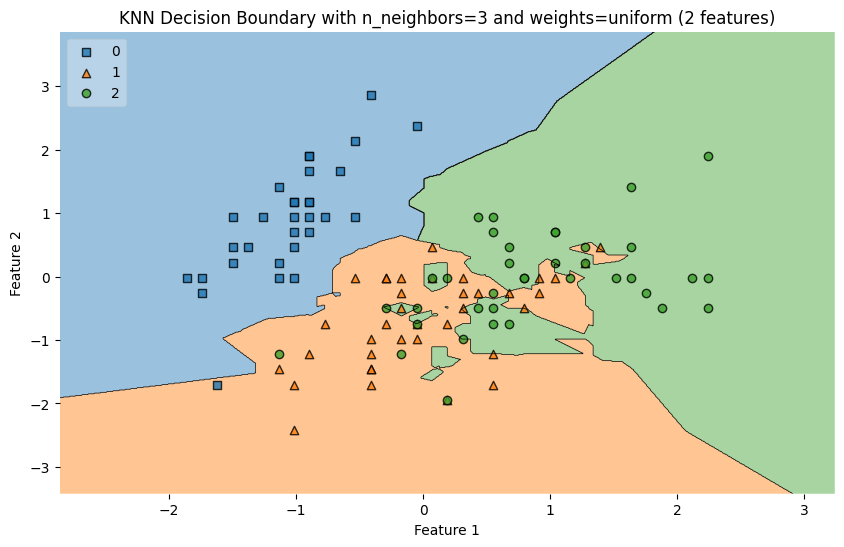

In [15]:
plt.figure(figsize=(10, 6))
plot_decision_regions(X_train_2d, y_train, clf=best_knn_2d, legend=2)
plt.title(f'KNN Decision Boundary with n_neighbors={best_knn_params[0]} and weights={best_knn_params[1]} (2 features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


### <a id='toc1_6_6_'></a>[Conclusion](#toc0_)

- The KNN model achieved perfect accuracy (1.0) for all tested values of n_neighbors (3, 5, 7, 9) and both weight options (uniform and distance). This indicates that the model is highly effective in classifying the test data with the given parameters.

----